In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
data = pd.read_csv('Train_data.csv')

In [3]:
# Cell 3: Data Overview
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [4]:
# Cell 4: Missing Values
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate             

In [5]:
# Cell 5: Unique Values
print("Unique Values:\n", data.nunique())

Unique Values:
 duration                        758
protocol_type                     3
service                          66
flag                             11
src_bytes                      1665
dst_bytes                      3922
land                              2
wrong_fragment                    3
urgent                            2
hot                              22
num_failed_logins                 5
logged_in                         2
num_compromised                  28
root_shell                        2
su_attempted                      3
num_root                         28
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           466
srv_count                       414
serror_rate                      70
srv_serror_rate                  56
rerror_rate                      72
srv_rerror_r

__Distribution of Target Variable__:

Ce graphique montre la distribution des étiquettes de classe dans votre dataset, en comptant combien d'instances appartiennent à chaque classe.

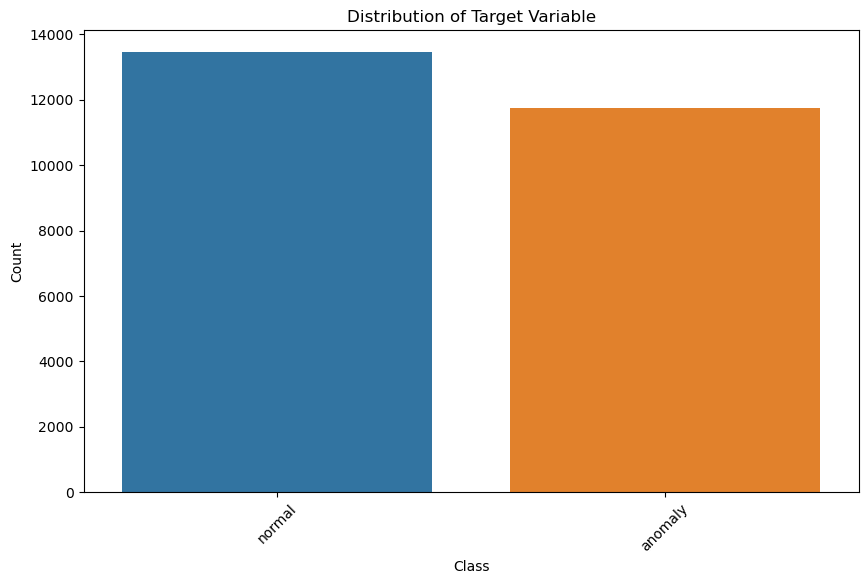

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


__Analyse :__ Ce type de graphique est essentiel pour comprendre l'équilibre de votre dataset. Si une classe est fortement sur-représentée par rapport aux autres (déséquilibre de classes), cela peut affecter la performance de votre modèle, en le rendant biaisé vers la classe majoritaire. Si vous constatez un tel déséquilibre, des techniques comme le sur-échantillonnage, le sous-échantillonnage, ou l'utilisation de méthodes de pondération peuvent être nécessaires pour compenser cet effet.

__Heatmap de la Matrice de Corrélation pour l'ensemble des Features du dataset__:

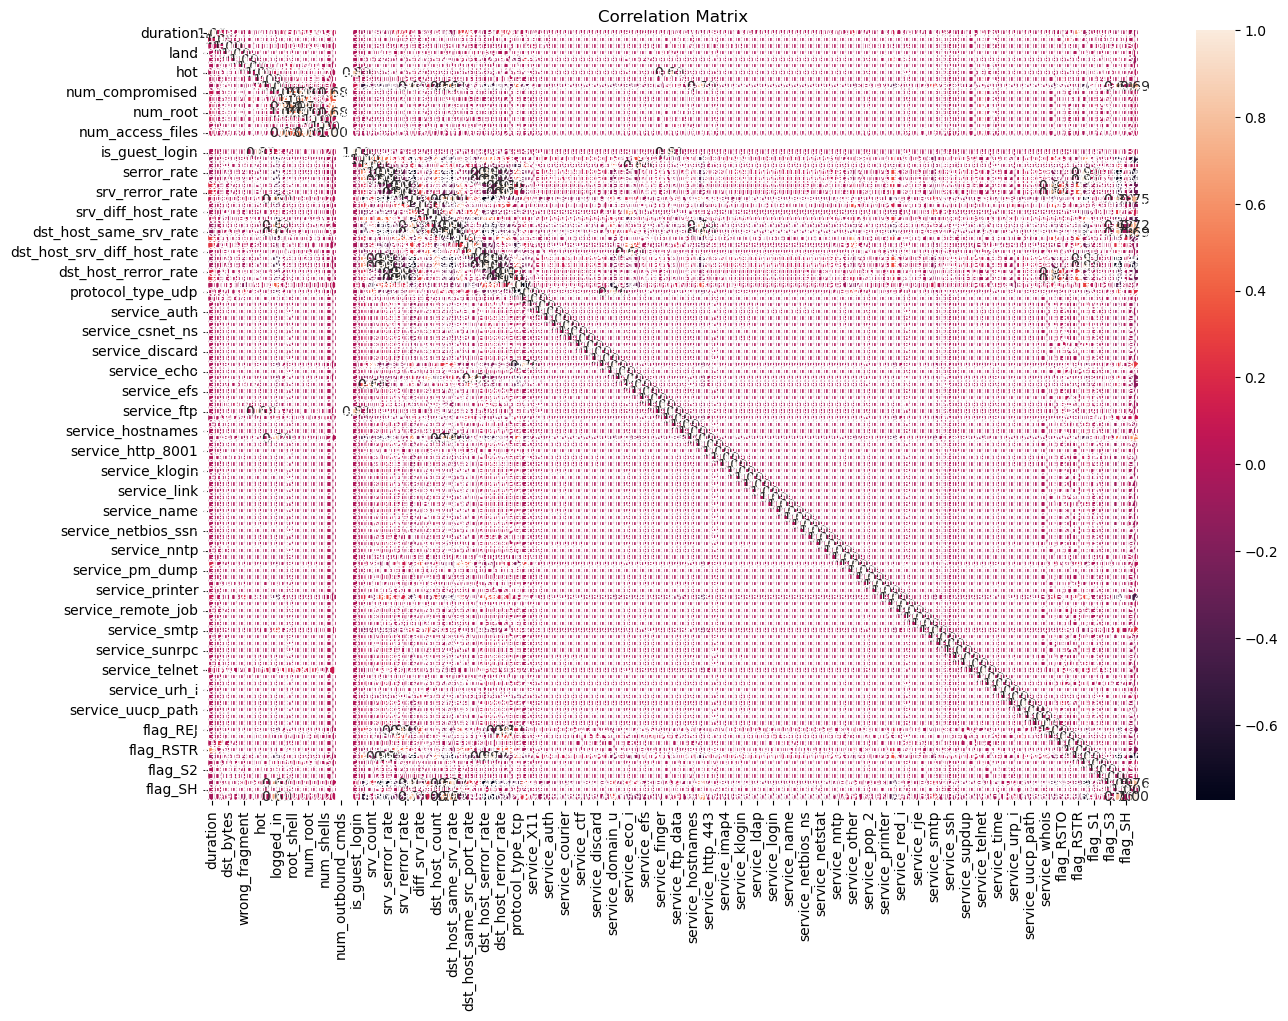

In [7]:
# Convertir les variables catégorielles en numériques
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculer la matrice de corrélation
correlation_matrix = data_encoded.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

__Boxplot des Features Numériques Groupées par la Variable Cible__:

Un boxplot représente la distribution d'une feature numérique pour chaque classe. Il montre les quartiles de la distribution, les valeurs médianes, ainsi que les valeurs aberrantes.

C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3266707453.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_

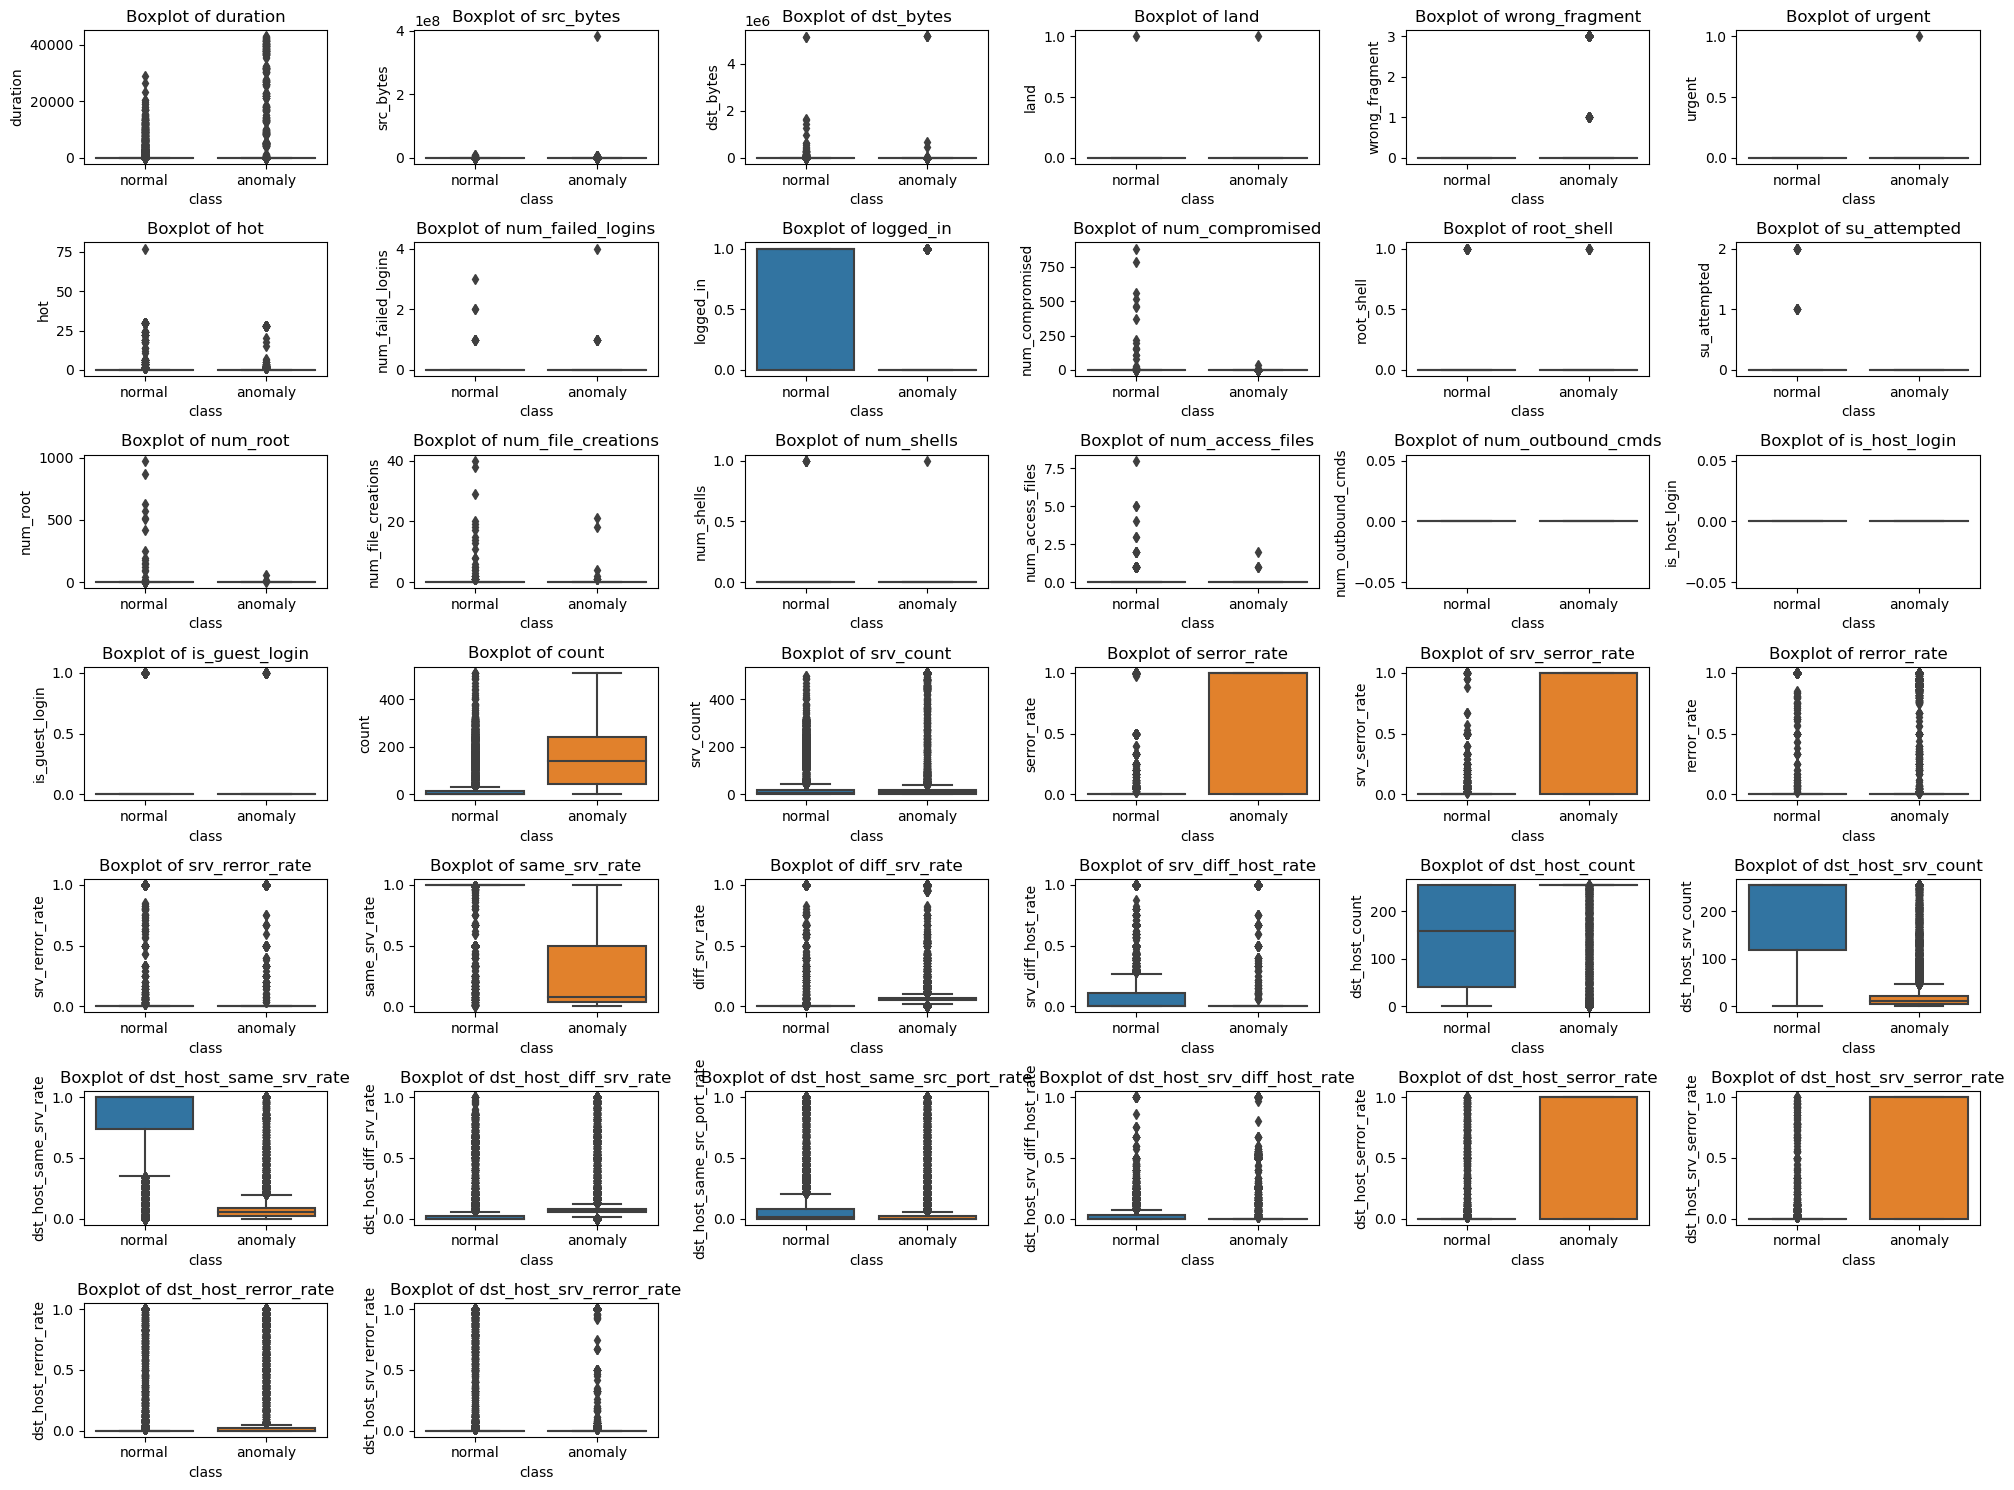

In [8]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(7, 6, i)
    sns.boxplot(x='class', y=feature, data=data)
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

__Analyse :__ En examinant les boxplots, vous pouvez observer comment chaque feature se comporte selon les différentes classes. Des différences significatives entre les distributions pour différentes classes peuvent indiquer que ces features sont pertinentes pour distinguer les classes dans votre modèle. Par exemple, une feature dont la médiane varie fortement entre les classes pourrait être un bon indicateur de l'état de la machine.

In [9]:
import joblib

# Charger les features sélectionnées
selected_features = joblib.load('selected_features.pkl')
print("Selected features:", selected_features)
# Vérifier si les features sélectionnées existent dans les colonnes du dataset
missing_features = [feature for feature in selected_features if feature not in data.columns]
if missing_features:
    print(f"Les features suivantes sont manquantes: {missing_features}")
else:
    print("Toutes les features sélectionnées sont présentes dans le dataset.")


Selected features: Index(['logged_in', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'flag_S0', 'flag_SF'],
      dtype='object')
Les features suivantes sont manquantes: ['flag_S0', 'flag_SF']


In [10]:
# Exclure les features manquantes
selected_features_filtered = [feature for feature in selected_features if feature in data.columns]
print("Filtered selected features:", selected_features_filtered)


Filtered selected features: ['logged_in', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


__Histograms des freatures sélectionnées:__

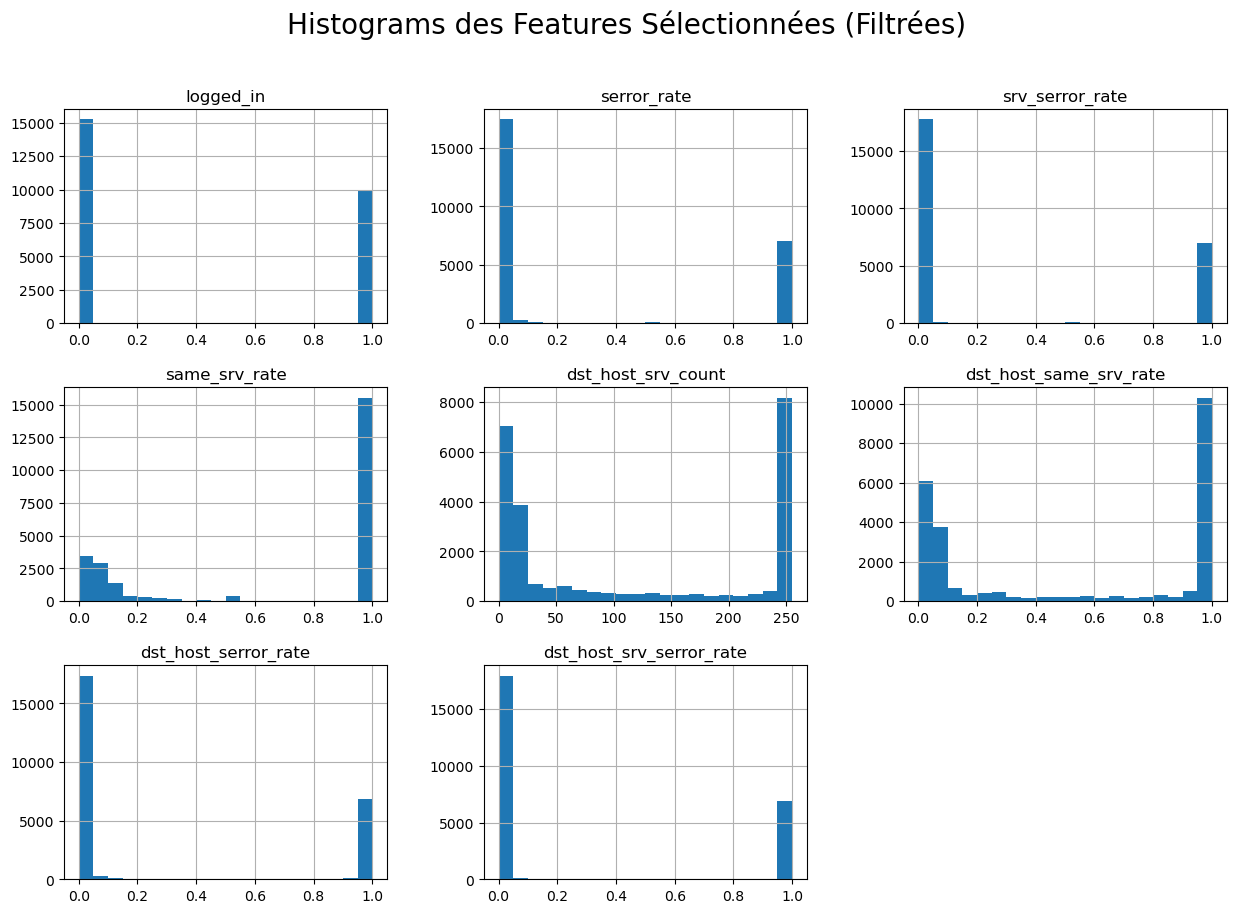

In [11]:
# Afficher les histogrammes pour chaque feature sélectionnée après filtration
data[selected_features_filtered].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms des Features Sélectionnées (Filtrées)', size=20)
plt.show()


Interprétation :

_Axe des X : Il représente les valeurs des différentes features sélectionnées après filtration. Par exemple, pour des features comme serror_rate ou same_srv_rate, les valeurs sont comprises entre 0 et 1, ce qui correspond à des taux ou des proportions.

_Axe des Y : Il montre la fréquence de ces valeurs dans le dataset. Par exemple, un pic à 10 000 signifie qu'environ 10 000 échantillons dans le dataset ont une valeur spécifique pour cette feature.

_Observation : Ces histogrammes permettent d'analyser la distribution des valeurs pour chaque feature. Par exemple, si la majorité des valeurs pour une feature donnée se trouvent autour de 0, cela pourrait indiquer que cette feature a une tendance dominante, comme un taux d'erreur faible pour la majorité des échantillons.

__Heatmap de la Matrice de Corrélation des Features Sélectionnées(Filtrées)__

La heatmap de la matrice de corrélation est un graphique qui montre la relation linéaire entre chaque paire de features sélectionnées. Les coefficients de corrélation varient de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite), avec 0 indiquant l'absence de corrélation

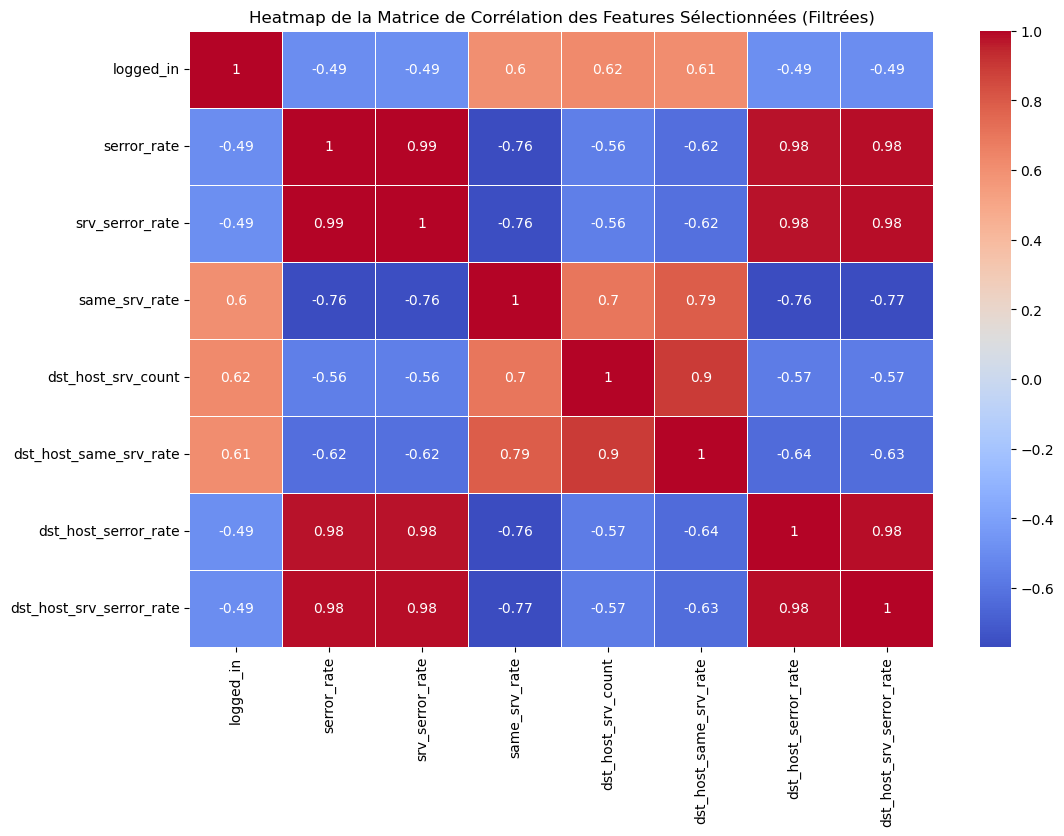

In [12]:
# Calculer la matrice de corrélation pour les features sélectionnées après filtration
correlation_matrix = data[selected_features_filtered].corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de la Matrice de Corrélation des Features Sélectionnées (Filtrées)')
plt.show()


__Analyse :__ En observant cette heatmap, vous pouvez identifier les features qui sont fortement corrélées entre elles. Une forte corrélation entre deux features peut indiquer une redondance, ce qui pourrait être pris en compte lors de la sélection des features pour votre modèle. Par exemple, des valeurs proches de 1 ou -1 entre certaines features pourraient suggérer qu'elles capturent des informations similaires sur l'état de la machine.

__Scatter Plot 3D des Features Sélectionnées__ :

Ce graphique en 3D montre la relation entre trois features sélectionnées (logged_in, serror_rate, dst_host_srv_serror_rate) en les représentant sur les axes X, Y, et Z respectivement. Les points sont colorés en fonction de la classe (class) à laquelle ils appartiennent.

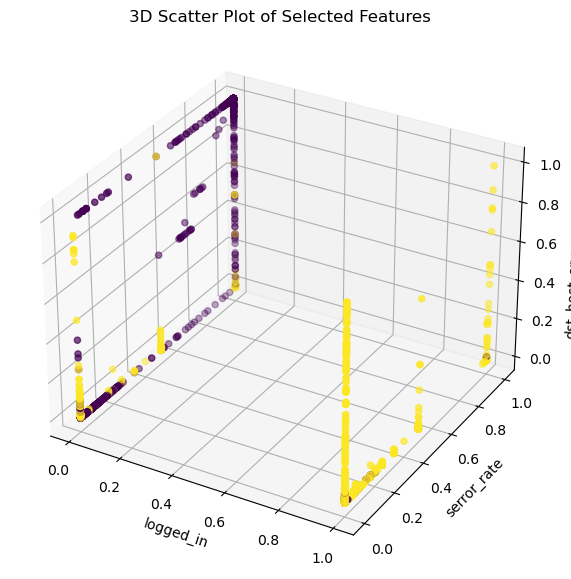

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot of three selected features
ax.scatter(data['logged_in'], data['serror_rate'], data['dst_host_srv_serror_rate'], 
           c=pd.Categorical(data['class']).codes, cmap='viridis')
ax.set_xlabel('logged_in')
ax.set_ylabel('serror_rate')
ax.set_zlabel('dst_host_srv_serror_rate')
ax.set_title('3D Scatter Plot of Selected Features')
plt.show()


__Analyse :__ Ce type de graphique permet de visualiser comment les différentes classes se répartissent en fonction de ces trois features. Si les points appartenant à différentes classes se séparent clairement dans l'espace 3D, cela peut indiquer que ces features sont discriminantes pour la classification. Cependant, si les points se mélangent, cela pourrait indiquer que ces features ne suffisent pas à elles seules à distinguer les classes.

__TSNE Plot__

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


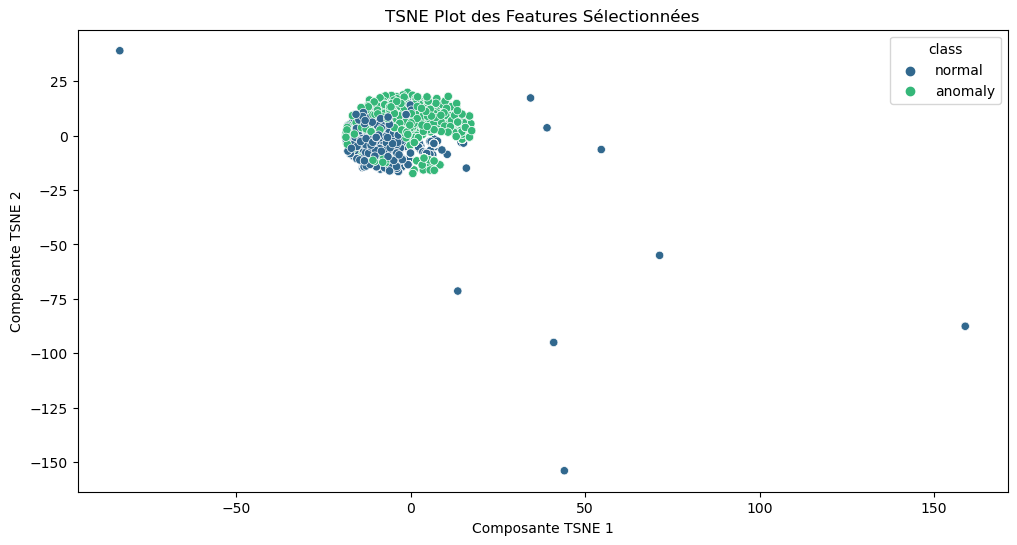

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_features_filtered])

# Transformation TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_data)

# Tracer le graphique TSNE
plt.figure(figsize=(12, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=data['class'], palette='viridis')
plt.title('TSNE Plot des Features Sélectionnées')
plt.xlabel('Composante TSNE 1')
plt.ylabel('Composante TSNE 2')
plt.show()


__Interprétation :__

__Axes X et Y :__ Ils représentent les deux composantes principales extraites par TSNE. Chaque point sur le graphique correspond à un échantillon dans le dataset, avec les couleurs représentant l'état (infecté ou non).

__Observation :__ Ce graphique visualise la séparation entre les échantillons infectés et non infectés selon les features sélectionnées. Si les points sont bien séparés par groupe, cela indique que les features choisies sont efficaces pour différencier les deux classes.

__Sunburst Plot (Graphique en rayons de soleil)__:


In [15]:
import plotly.express as px

# Création du Sunburst plot
fig = px.sunburst(data, path=['class', 'logged_in', 'serror_rate'], values='dst_host_srv_count',
                  color='dst_host_srv_count', hover_data=['srv_serror_rate', 'same_srv_rate'],
                  color_continuous_scale='viridis')
fig.update_layout(title='Sunburst Plot des Données de Machines')
fig.show()


__Interprétation :__

__Structure hiérarchique :__ Les niveaux hiérarchiques sont définis par les features label, logged_in, et serror_rate. La taille de chaque section représente la valeur de dst_host_srv_count.

__Observation :__ Ce graphique permet de visualiser la hiérarchie et la répartition des services de destination (dst_host_srv_count) en fonction des états des machines (class) et des autres features. C’est utile pour comprendre comment les machines infectées sont distribuées selon ces features.

__Lollipop Chart__

C:\Users\hp\AppData\Local\Temp\ipykernel_11388\99640699.py:8: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



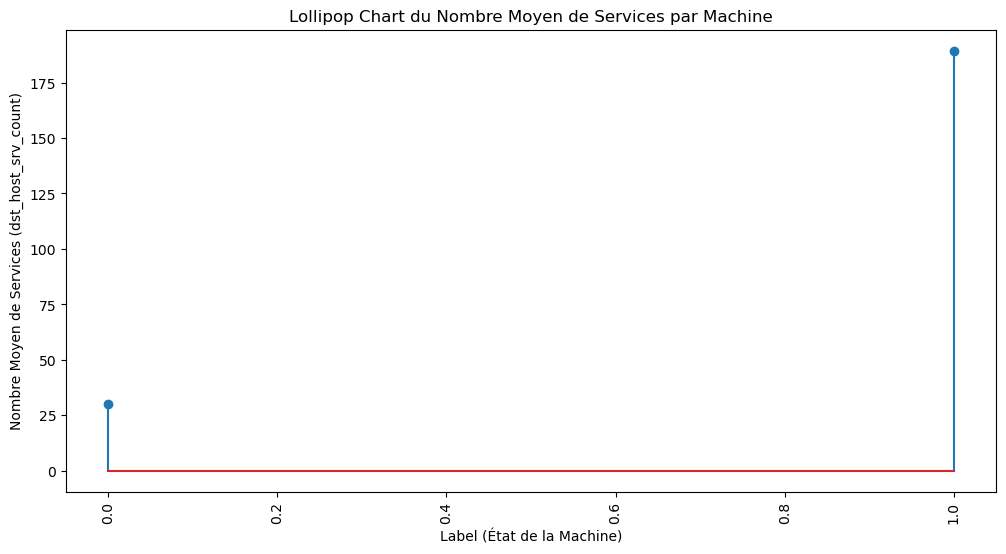

In [16]:
import matplotlib.pyplot as plt

# Calcul de la moyenne pour 'dst_host_srv_count' par label
avg_dst_host_srv_count = data.groupby('class')['dst_host_srv_count'].mean().sort_values()

# Tracer le Lollipop chart
plt.figure(figsize=(12, 6))
plt.stem(avg_dst_host_srv_count, use_line_collection=True)
plt.xticks(rotation=90)
plt.title('Lollipop Chart du Nombre Moyen de Services par Machine')
plt.xlabel('Label (État de la Machine)')
plt.ylabel('Nombre Moyen de Services (dst_host_srv_count)')
plt.show()


Interprétation :

_Axe des X :_ Il représente l'état des machines (class), que ce soit infecté ou non.

_Axe des Y :_ Il montre le nombre moyen de services de destination (dst_host_srv_count) pour chaque état.

_Observation :_ Ce graphique aide à comparer la moyenne des services de destination pour les machines infectées et non infectées, révélant ainsi des tendances spécifiques associées aux infections.

__Histogramme avec KDE pour une Feature (serror_rate)__

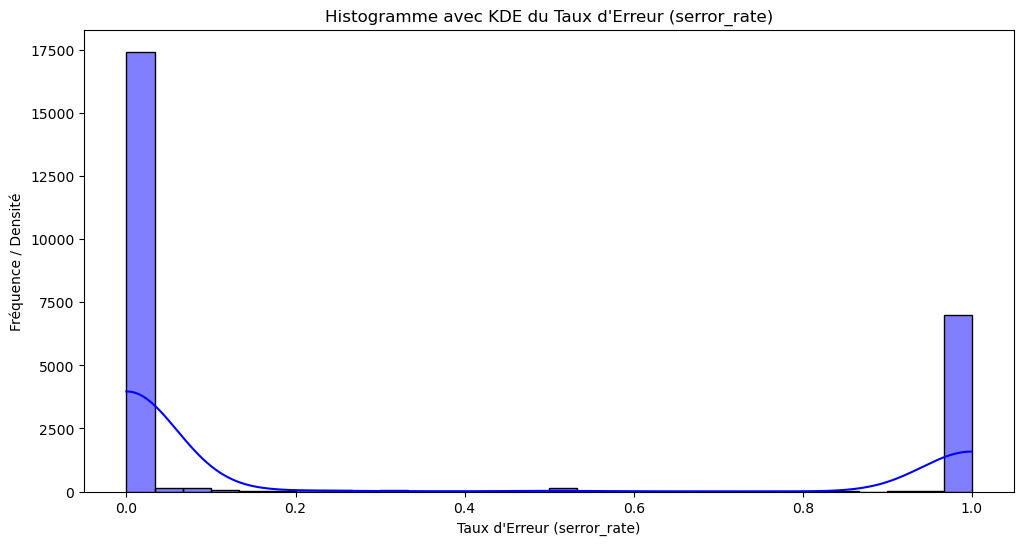

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['serror_rate'], kde=True, color='blue', bins=30)
plt.title('Histogramme avec KDE du Taux d\'Erreur (serror_rate)')
plt.xlabel('Taux d\'Erreur (serror_rate)')
plt.ylabel('Fréquence / Densité')
plt.show()


__Interprétation :__

__Histogramme et KDE :__ Ce graphique montre la distribution du serror_rate, avec la courbe KDE ajoutant une estimation de la densité. Cela permet de voir où se concentrent les taux d'erreur dans vos données.

__Observation :__ Ce graphique peut révéler si la majorité des échantillons ont un taux d'erreur bas ou élevé, ce qui pourrait être un indicateur clé pour détecter les machines susceptibles d'être infectées.

__Bubble Plot pour 'logged_in', 'serror_rate', et 'srv_serror_rate'__

Ce graphique montre la relation entre trois variables : logged_in, serror_rate, et srv_serror_rate. La taille des bulles représente une quatrième variable, ici dst_host_srv_count.

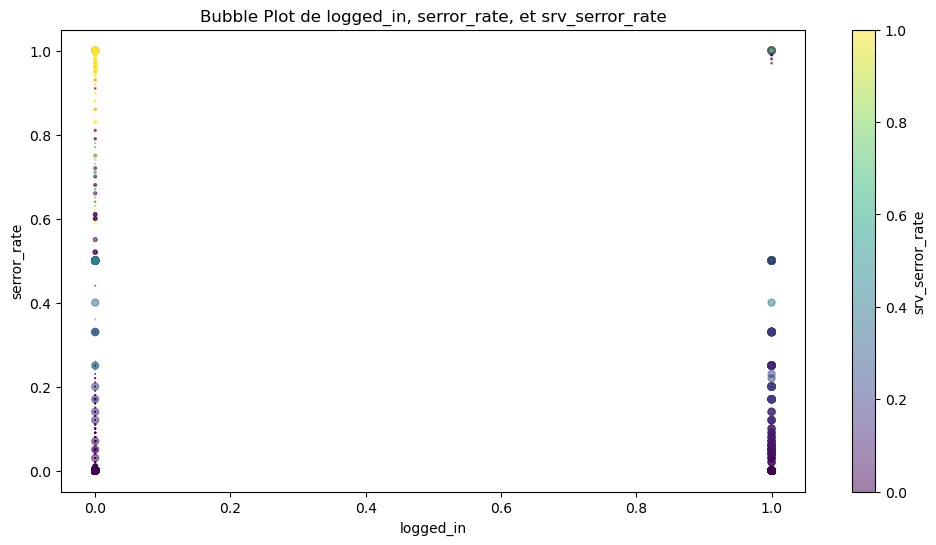

In [18]:
plt.figure(figsize=(12, 6))
bubble_sizes = data['dst_host_srv_count'] / 10  # Redimensionnement des bulles
plt.scatter(data['logged_in'], data['serror_rate'], s=bubble_sizes, alpha=0.5, c=data['srv_serror_rate'], cmap='viridis')
plt.colorbar(label='srv_serror_rate')
plt.title('Bubble Plot de logged_in, serror_rate, et srv_serror_rate')
plt.xlabel('logged_in')
plt.ylabel('serror_rate')
plt.show()


__Analyse :__
Ce graphique vous aide à visualiser comment les machines se comportent en fonction de leur état de connexion (logged_in) et du taux d'erreur côté source (serror_rate). Les bulles plus grandes indiquent un plus grand nombre de services hôtes, ce qui pourrait indiquer une activité plus élevée ou des anomalies potentielles.

__Pair Plot__

Un pair plot montre les relations pairées entre les variables, ainsi que les distributions individuelles des variables.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



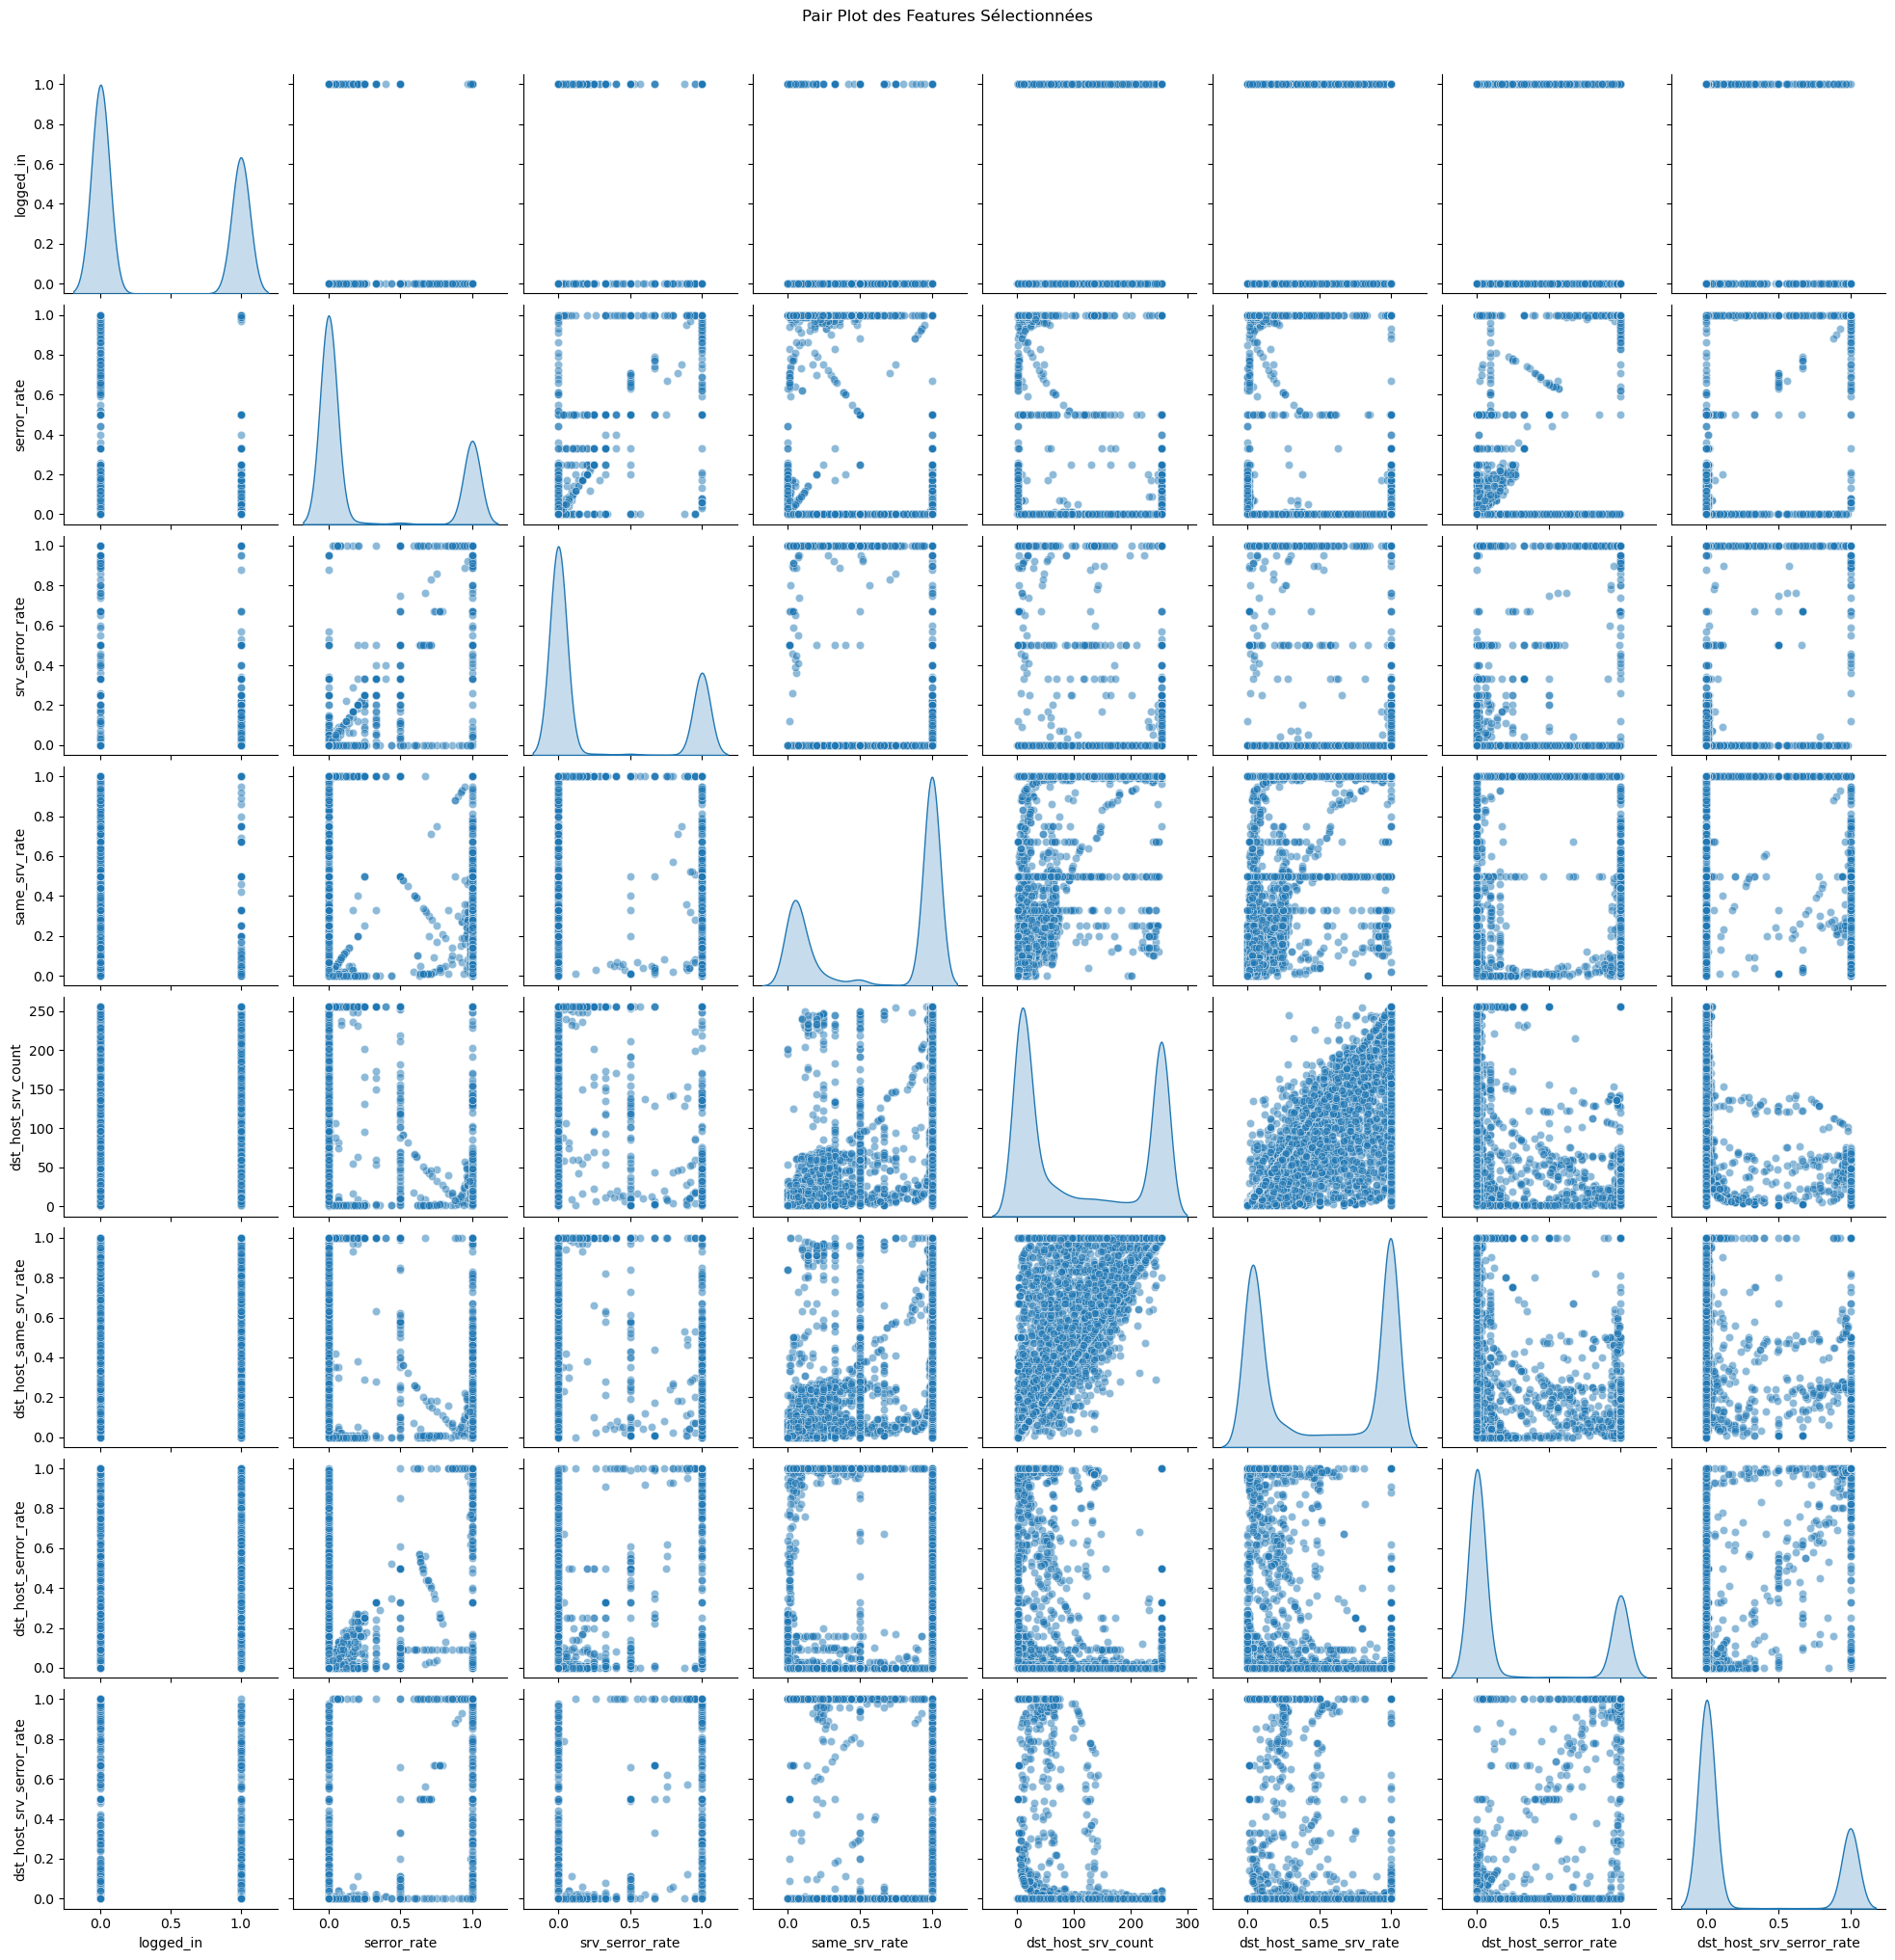

In [19]:
sns.pairplot(data[selected_features_filtered], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot des Features Sélectionnées', y=1.02)
plt.show()


__Analyse :__ Ce graphique vous permet de voir comment les variables interagissent deux à deux, et d'observer les distributions univariées. Cela peut être particulièrement utile pour détecter des clusters ou des anomalies.

__Box Plot pour Visualiser les Outliers__ :

Le box plot est utilisé pour représenter les distributions de données et pour identifier des valeurs aberrantes (outliers).

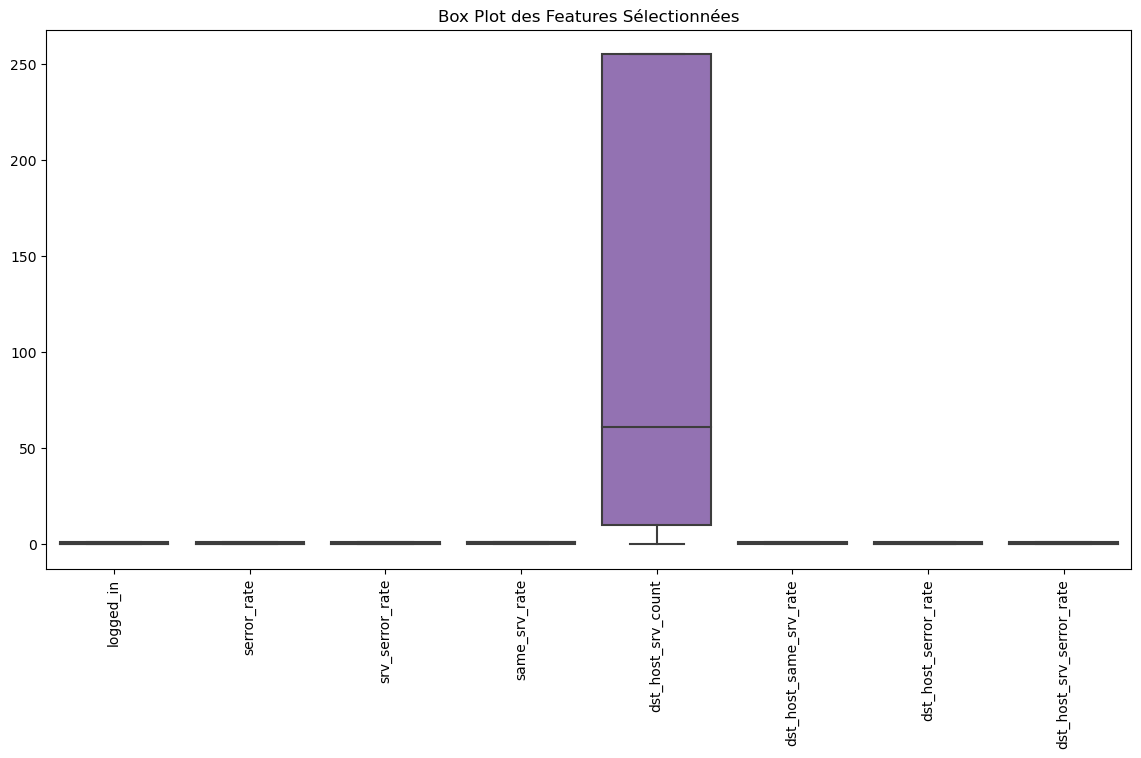

In [20]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data[selected_features_filtered])
plt.title('Box Plot des Features Sélectionnées')
plt.xticks(rotation=90)
plt.show()


__Analyse :__ Ce graphique vous permet de voir comment les variables interagissent deux à deux, et d'observer les distributions univariées. Cela peut être particulièrement utile pour détecter des clusters ou des anomalies.

__Violin Plot pour Analyser les Distributions__

Un violin plot combine les avantages d’un box plot et d’un KDE (Kernel Density Estimate).

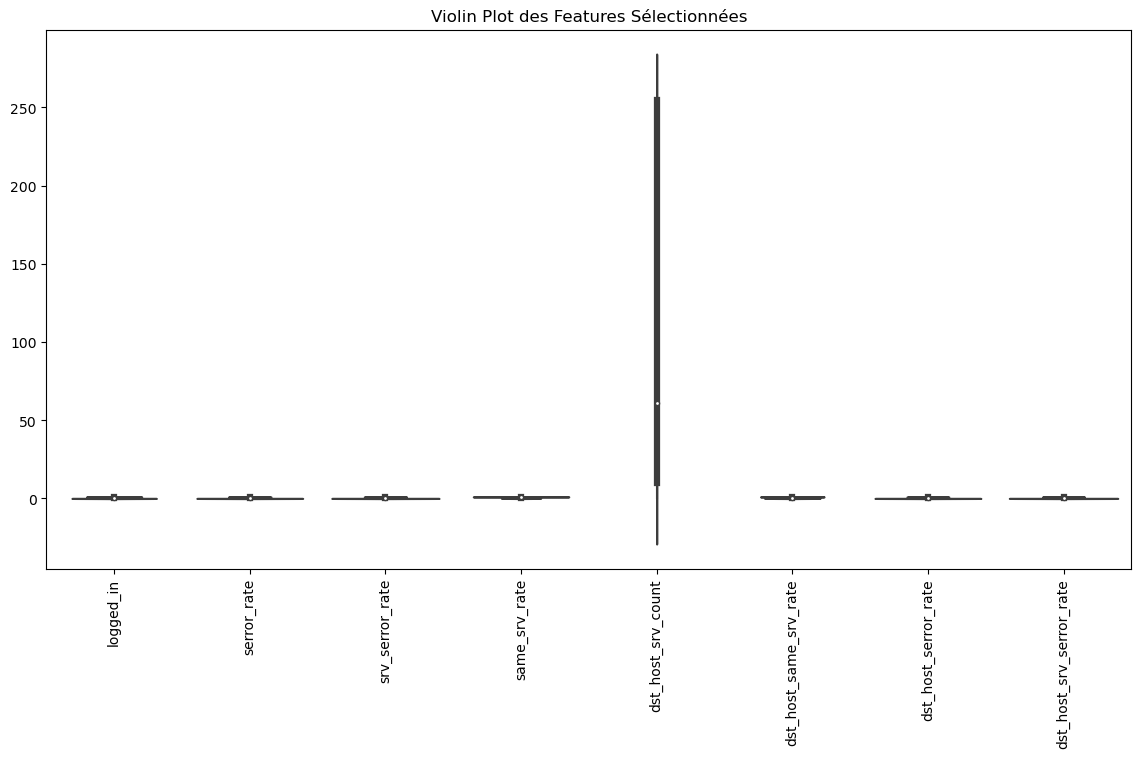

In [21]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=data[selected_features_filtered])
plt.title('Violin Plot des Features Sélectionnées')
plt.xticks(rotation=90)
plt.show()


__Analyse :__ Ce graphique montre la distribution des données pour chaque variable, tout en mettant en évidence les éventuels sous-groupes dans les données. C’est utile pour voir comment les distributions varient et pour comparer différentes variable

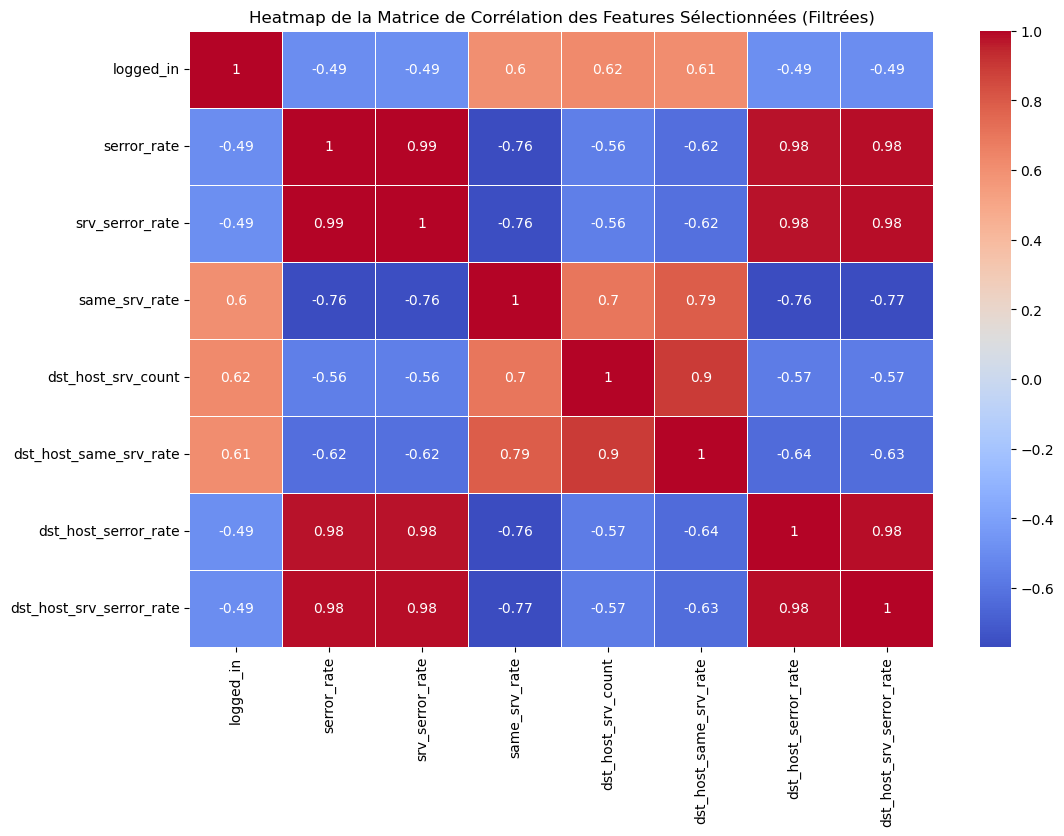

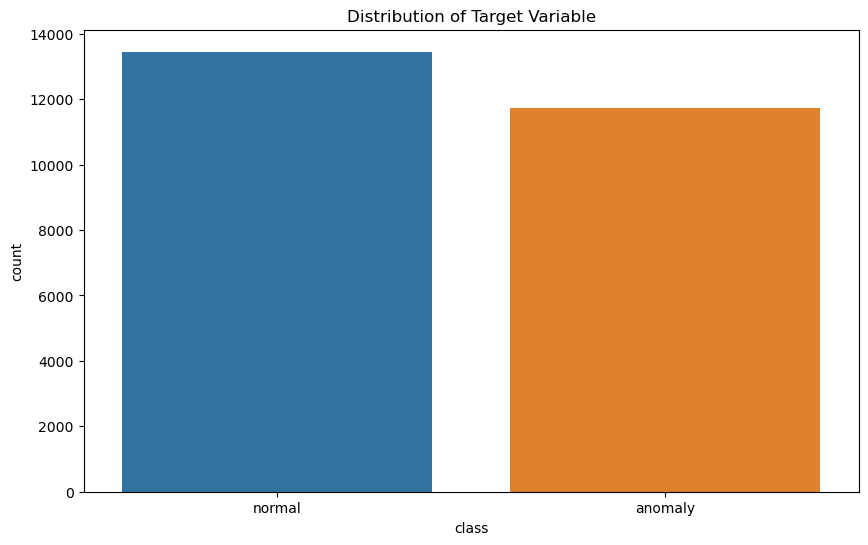

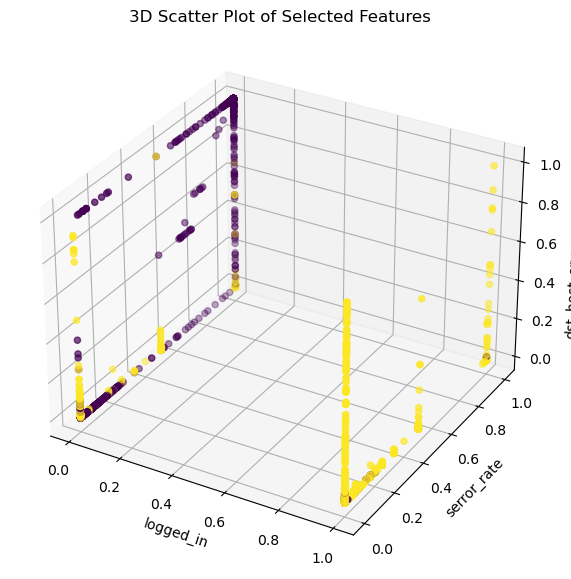

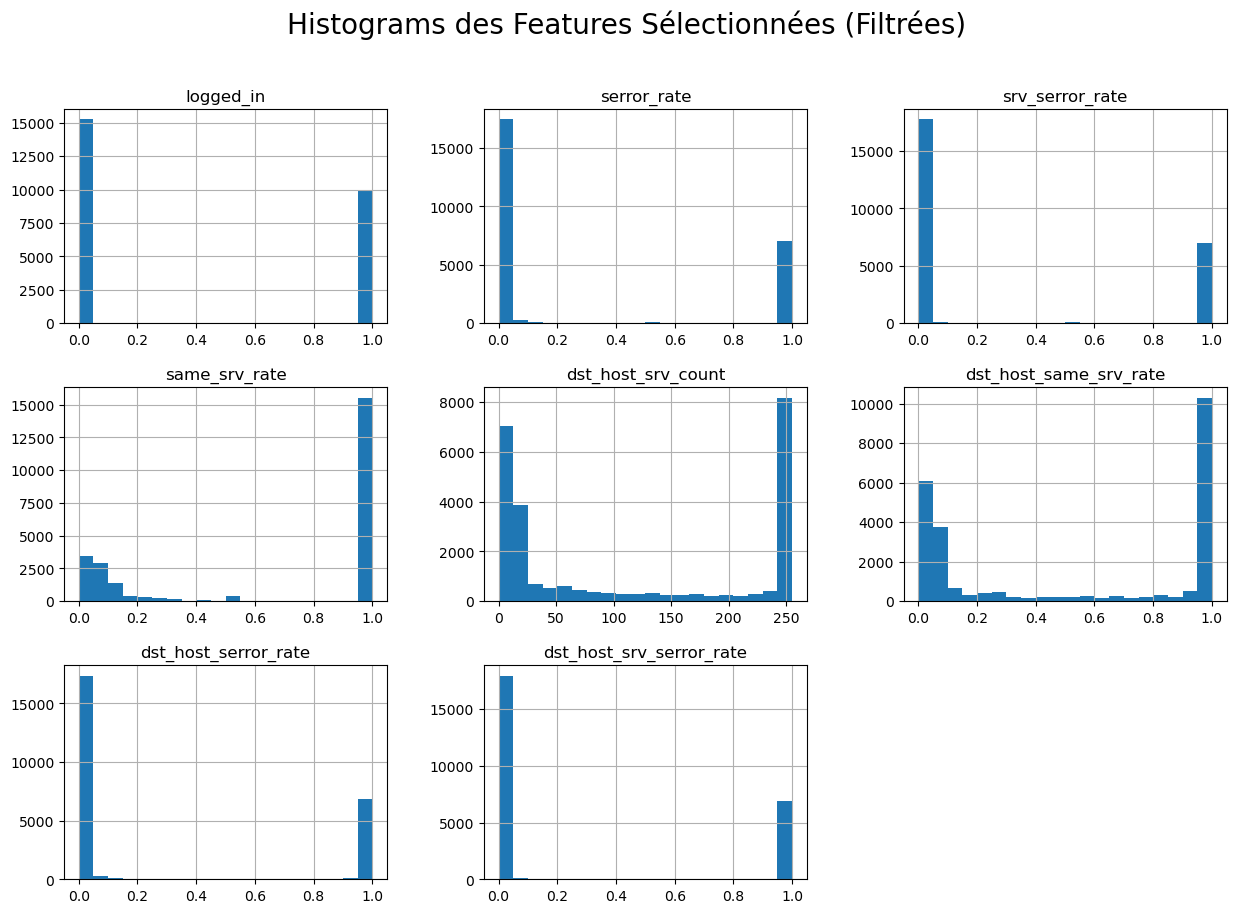

C:\Users\hp\AppData\Local\Temp\ipykernel_11388\3724222100.py:45: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



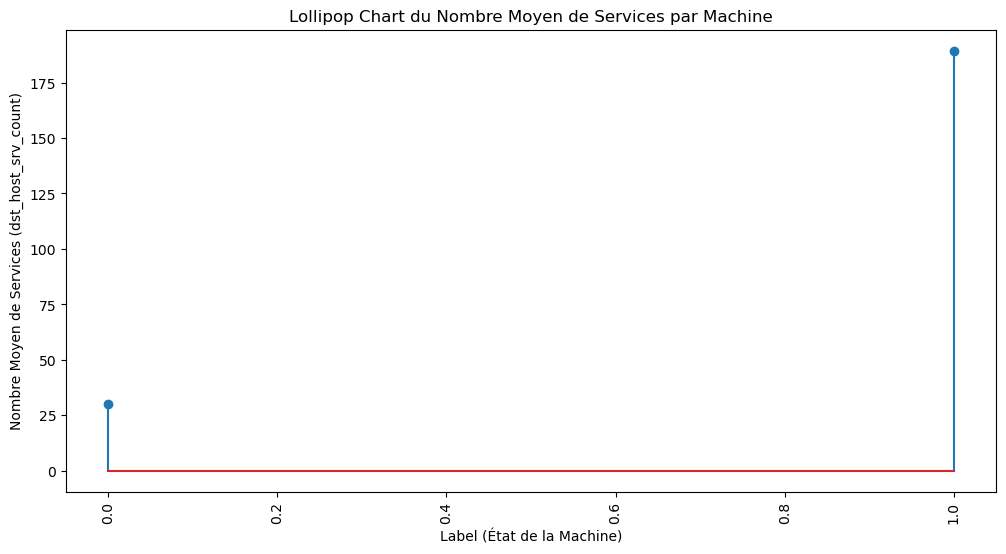

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your dataframe

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[selected_features_filtered].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de la Matrice de Corrélation des Features Sélectionnées (Filtrées)')
plt.savefig('static/correlation_heatmap.png')
plt.show()  # Optionnel si vous voulez aussi l'afficher

# 2. Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable')
plt.savefig('static/target_distribution.png')
plt.show()  # Optionnel

# 3. 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['logged_in'], data['serror_rate'], data['dst_host_srv_serror_rate'], 
           c=pd.Categorical(data['class']).codes, cmap='viridis')
ax.set_xlabel('logged_in')
ax.set_ylabel('serror_rate')
ax.set_zlabel('dst_host_srv_serror_rate')
ax.set_title('3D Scatter Plot of Selected Features')
plt.savefig('static/3d_scatter.png')
plt.show()  # Optionnel

# 4. Histogrammes des Features Sélectionnées
data[selected_features_filtered].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms des Features Sélectionnées (Filtrées)', size=20)
plt.savefig('static/Histograms.png')
plt.show()

# 5. Lollipop Chart
# Calcul de la moyenne pour 'dst_host_srv_count' par label
avg_dst_host_srv_count = data.groupby('class')['dst_host_srv_count'].mean().sort_values()

# Tracer le Lollipop chart
plt.figure(figsize=(12, 6))
plt.stem(avg_dst_host_srv_count, use_line_collection=True)
plt.xticks(rotation=90)
plt.title('Lollipop Chart du Nombre Moyen de Services par Machine')
plt.xlabel('Label (État de la Machine)')
plt.ylabel('Nombre Moyen de Services (dst_host_srv_count)')
plt.savefig('static/Lollipop_chart.png')
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('annotated_data.csv')

In [24]:
data

logged_in  serror_rate  srv_serror_rate  same_srv_rate  dst_host_srv_count  \
0          0         0.80             0.70           0.05                  10   
1          1         0.10             0.10           0.90                 200   
2          0         0.60             0.50           0.10                  50   
3          1         0.05             0.02           0.20                  30   

   dst_host_same_srv_rate  dst_host_serror_rate  dst_host_srv_serror_rate  \
0                    0.10                  0.60                      0.65   
1                    0.85                  0.05                      0.02   
2                    0.40                  0.40                      0.50   
3                    0.60                  0.02                      0.01   

   flag_S0  flag_SF                                      anomaly_cause  
0        1        0  Attaque SYN flood: Un taux élevé d'erreurs SYN...  
1        0        1  Surcharge de service: Un taux anormalement éle...  
2        1        0  Scan de port ou tentative de déni de service: ...  
3        0        1                                             Normal

In [25]:
data=pd.read_csv('Test_data.csv')

In [26]:
data

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0                   0       0    0  ...             255                  10   
1                   0       0    0  ...             255                   1   
2                   0       0    0  ...             134                  86   
3                   0       0    0  ...               3                  57   
4                   0       0    0  ...              29                  86   
...               ...     ...  ...  ...             ...                 ...   
22539               0       0    0  ...             100                 141   
22540               0       0    0  ...             197                 255   
22541               0       0    2  ...             255                 255   
22542               0       0    0  ...             255                 252   
22543               0       0    0  ...             255                  21   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                        0.04                    0.06   
1                        0.00                    0.06   
2                        0.61                    0.04   
3                        1.00                    0.00   
4                        0.31                    0.17   
...                       ...                     ...   
22539                    0.72                    0.06   
22540                    1.00                    0.00   
22541                    1.00                    0.00   
22542                    0.99                    0.01   
22543                    0.08                    0.03   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             0.00                         0.00   
1                             0.00                         0.00   
2                             0.61                         0.02   
3                             1.00                         0.28   
4                             0.03                         0.02   
...                            ...                          ...   
22539                         0.01                         0.01   
22540                         0.01                         0.01   
22541                         0.00                         0.00   
22542                         0.00                         0.00   
22543                         0.00                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                       0.0                  1.00   
1                      0.00                       0.0                  1.00   
2                      0.00                       0.0                  0.00   
3                      0.00                       0.0                  0.00   
4                      0.00                       0.0                  0.83   
...                     ...                       ...                   ...   
22539                  0.01                       0.0                  0.00   
22540      